### Analysis and prediction of cardiovascular disease using physical traits and lifestyle habits.

### Problem Statement

According to the World Health Organisation, cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives per year.

Individuals at risk of CVD may demonstrate raised blood pressure, glucose, as well as overweight and obesity. These can all be easily measured in primary care facilities. Identifying those at highest risk of CVDs and ensuring they receive appropriate treatment can prevent premature deaths. Access to essential noncommunicable disease medicines and basic health technologies in all primary health care facilities is essential to ensure that those in need receive treatment and counselling.

Early indication can be given if a predictive model could be built that reliably signal whether or not an individual is at risk of cardiovascular disease based on physical traits and lifestyle choices.

We use a dataset found here https://www.kaggle.com/sulianova/cardiovascular-disease-dataset to build a predictive model.

### Goal

For the purpose of this project, we will try to build a machine learning model to predict if an individual is at risk of CVDs based on 8 different physical traits and 3 different lifestyle habits.

In [296]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn

### Exploratory Data Analysis and Cleaning of Data

The dataset consists of 70000 records of patient data which contains of information of their physical traits and lifestyle habits including columns on weight, cholesterol level and whether or not the patient is a smoker.

First, let us explore the data we have.

In [297]:
# Import the data
df_raw = pd.read_csv('cardio.csv', sep = ';')

df_raw.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Note: ap_hi = systolic blood pressure, ap_lo = diastolic blood pressure

In [298]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


We can drop the id column as it is useless to us.

In [299]:
# Drop id column
df_raw.drop('id', axis = 1, inplace = True)

In [300]:
df_raw.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


We now check for duplication and missing values.

In [301]:
print('There are {} duplicated values'.format(df_raw.duplicated().sum()))

There are 24 duplicated values


Let's explore the duplicate values

In [302]:
duplicated = df_raw[df_raw.duplicated(keep = False)]
# Sort values to see duplication clearly
duplicated = duplicated.sort_values(by = ['age', 'gender', 'height'], ascending = False)

duplicated.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
1568,21945,1,165,60.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0
40301,21943,1,165,65.0,120,80,1,1,0,0,1,1


We can drop the duplicated values without affecting the training of our model.

In [303]:
# Drop duplicates
df_raw.drop_duplicates(inplace = True)

Check for duplicates.

In [304]:
print('There are {} duplicated values'.format(df_raw.duplicated().sum()))

There are 0 duplicated values


We now check for missing values.

In [305]:
print('There are {} missing values'.format(df_raw.isnull().sum().sum()))

There are 0 missing values


Our data is now clean.

#### Detecting for outliers

Detecting outliers and handling them appropriately can increase our accuracy score.

Let's proceed with checking for outliers.

In [306]:
x = df_raw.copy(deep = True)

In [307]:
x.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000,69976.000000
mean,19468.950126,1.349648,164.359152,74.208519,128.820453,96.636261,1.366997,1.226535,0.088159,0.053790,0.803718,0.499771
std,2467.374620,0.476862,8.211218,14.397211,154.037729,188.504581,0.680333,0.572353,0.283528,0.225604,0.397187,0.500004
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


There appears to be outliers within the columns age, weight, ap_hi, ap_lo.

To scale them, we would need to standardize them first.

We standardize them by calculating their z-values.

z = (x - E(x))/std(x)

In [308]:
s_list = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
def z(x):
    x_std = x.copy(deep = True)
    for column in s_list:
        x_std[column] = (x_std[column] - x_std[column].mean()) / x_std[column].std()
    return x_std
x_std = z(x)
x_std.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,-0.436071,2,0.443399,-0.847978,-0.122181,-0.088254,1,1,0,0,1,0
1,0.307635,1,-1.018016,0.749554,0.072577,-0.035205,3,1,0,0,1,1
2,-0.248017,1,0.078045,-0.709062,0.007658,-0.141303,3,1,0,0,0,1
3,-0.748143,2,0.565184,0.541180,0.137496,0.017844,1,1,0,0,1,1
4,-0.808532,1,-1.018016,-1.264725,-0.187100,-0.194352,1,1,0,0,0,0


We need to melt the data before we plot our graph.

In [309]:
x_melted = pd.melt(frame = x_std, id_vars = 'cardio', value_vars = s_list, var_name = 'features', value_name = 'value', col_level = None)
x_melted

,cardio,features,value
0,0,age,-0.436071
1,1,age,0.307635
2,1,age,-0.248017
3,1,age,-0.748143
4,0,age,-0.808532
...,...,...,...
349875,0,ap_lo,-0.088254
349876,1,ap_lo,-0.035205
349877,1,ap_lo,-0.035205
349878,1,ap_lo,-0.088254


Now we can plot our box plot.

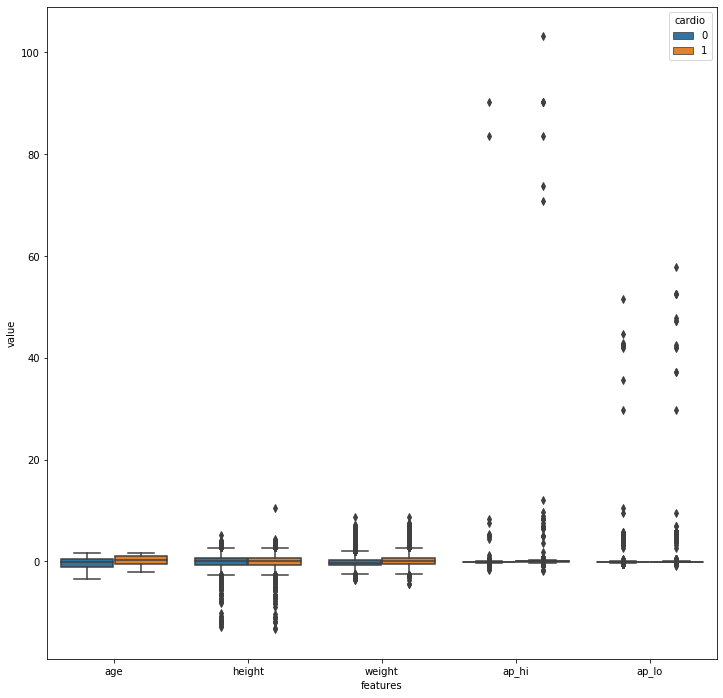

In [310]:
plt.figure(figsize = (12, 12))
sns.boxplot(x = 'features', y = 'value', hue = 'cardio', data = x_melted)

As we can see, there are some outliers in our data. However, we also observe extreme outliers in our data for ap_hi and ap_lo.

We will try to address these extreme outliers.

Let's calculate the upper and lower bounds of our above features.

In [311]:
# We create an empty dataframe to contain the bounds
bounds = pd.DataFrame(index = ['lower', 'upper'])

for values in s_list:
    quart_1 = x[values].quantile(0.25)
    quart_3 = x[values].quantile(0.75)
    inter_quartile = quart_3 - quart_1
    
    lower = quart_1 - (1.5 * inter_quartile)
    upper = quart_3 + (1.5 * inter_quartile)
    bounds[values] = [lower, upper]
    
bounds

,age,height,weight,ap_hi,ap_lo
lower,12169.5,142.5,39.5,90.0,65.0
upper,26821.5,186.5,107.5,170.0,105.0


We will now create filters only for the upper bounds because that is where the extreme outliers are at.

In [312]:
# We create the filters
ap_hi_filter = (x['ap_hi'] > bounds['ap_hi'][1])
ap_lo_filter = (x['ap_lo'] > bounds['ap_lo'][1])
out_filter = (ap_hi_filter | ap_lo_filter)
# We apply the filter on x to get x_outliers
x_out = x[outlier_filter]
x_out['cardio'].value_counts()

1    2025
0     388
Name: cardio, dtype: int64

As we can see, CVDs are present in 83% of the ap_hi and ap_lo outliers.

ap_hi and ap_lo represents high blood pressure, the high rate of CVDs is to be expected.

We can drop the data from the dataset as we have sufficient data.

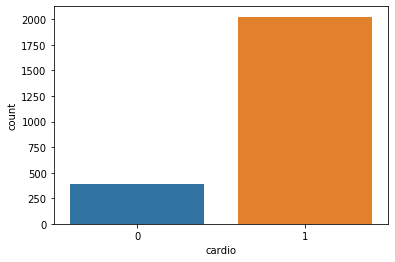

In [313]:
sns.countplot(x = 'cardio', data = x_out, linewidth = 1)

After some research, I found out that and individual with ap_hi > 180 or ap_lo > 120  would require immediate medical attention.

As such, it would be safe to say that we can drop ap_hi > 240 and ap_lo > 200

In [314]:
out_filter = ((x['ap_hi'] > 240) | (x['ap_lo'] > 200))
print('There are {} outlier'.format(x[out_filter]['cardio'].count()))

There are 993 outlier


In [315]:
x_filtered = x[~out_filter]

#### Look at the number of people by age with and without cardiovascular disease.

Text(0.5, 1.0, 'Comparison within age groups')

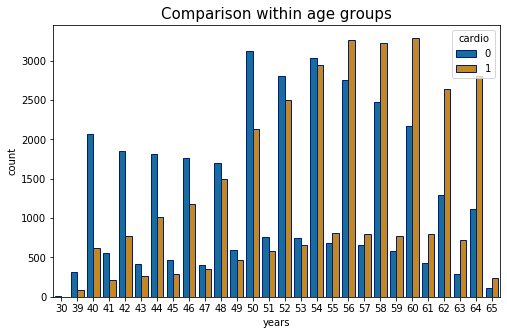

In [316]:
# Create a years column
df['years'] = (df['age'] / 365).round(0)
df['years'] = pd.to_numeric(df['years'], downcast = 'integer')

# Visualise the data
plt.figure(figsize = (8, 5))
sns.countplot(x = 'years', hue = 'cardio', data = df, palette = 'colorblind', edgecolor = sns.color_palette('dark', n_colors = 1)).set_title('Comparison within age groups', fontsize = 15)

We can see that at age 55 onwards, the number of people with a CVDs exceeds the number of people without.

We can now plot the correlation of the filtered dataset.

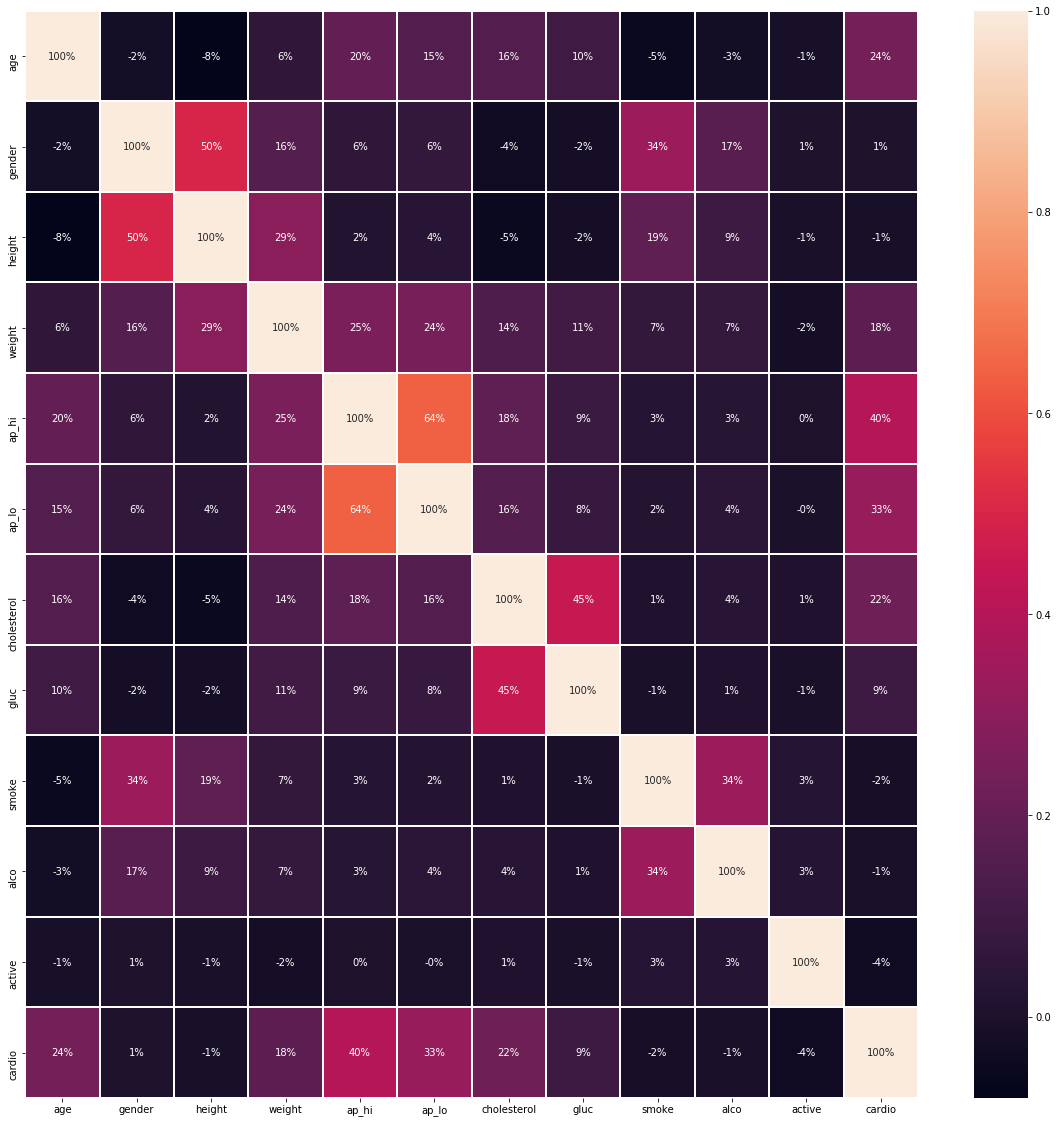

In [317]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(x_filtered.corr(), annot = True, fmt = '.0%', linewidth = 1, ax = ax)

As expected, age, weight, blood pressure and cholesterol have a high correlation with CVDs.

Glucose seems to have a decently high correlation as well.

What is surprising is that smoking, alcohol consumption and active lifestyle seems to have a very low correlation with CVDs.

### Deep dive into lifestyle habits.

Here we will take a deeper look into individual's lifestyle habits.

#### Comparing Between Smokers and Non Smokers

Medical professionals have always warned us that smoking causes CVDs.

Let's take a closer look.

In [318]:
# Get a count of smokers vs non smokers
df['smoke'].value_counts()

0    63831
1     6169
Name: smoke, dtype: int64

Text(0.5, 1.0, 'Smokers vs non smokers')

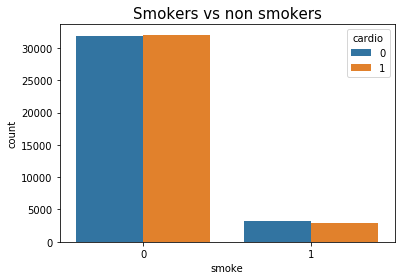

In [319]:
# Plot smokers vs non smokers
sns.countplot(x = 'smoke', hue = 'cardio', data = df).set_title('Smokers vs non smokers', fontsize = 15)

Both 0 and 1 seems to have a roughly equal amount of individuals with CVDs within their respective groups.

Results are unexpected. I expected one side to have significantly more individuals with CVDs.

As the dataset doesn't tell us which group 0 and 1 represents, we can drop this column.

This could be due to having a small sample with respect to the amount of CVDs cases in the world.

Smokers can be classified into social smokers, moderate smokers and heavy smokers.

#### Comparing Between Drinkers and Non Drinkers

Medical professionals also warned us that drinking may lead to CVDs.

Let's take a closer look.

In [320]:
# Get a count of drinkers vs non drinkers
df['alco'].value_counts()

0    66236
1     3764
Name: alco, dtype: int64

Text(0.5, 1.0, 'Drinkers vs non drinkers')

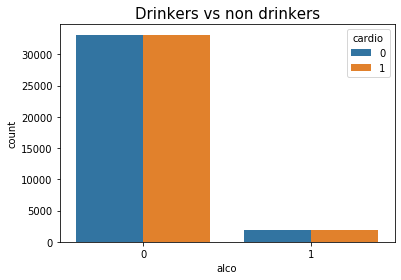

In [321]:
# Plot drinkers vs non drinkers
sns.countplot(x = 'alco', hue = 'cardio', data = df).set_title('Drinkers vs non drinkers', fontsize = 15)

There seems to be an equal chance of contracting CVDs regardless of whether or not the individual consumes alcohol.

Unfortunately as with smokers from above, the dataset does not tell us which group 0 and 1 represents, we will be dropping this column too.

Drinkers can be classified into light drinkers, moderate drinkers and heavy drinkers.

#### Comparing Between Active Individuals and Non Active Individuals (0 = non active, 1 = active)

An active lifestyle is always said to reduce the chances of CVDs.

Let's take a closer look.

In [322]:
# Get a count of active individuals vs non active individuals
df['active'].value_counts()

1    56261
0    13739
Name: active, dtype: int64

Text(0.5, 1.0, 'Active vs non active')

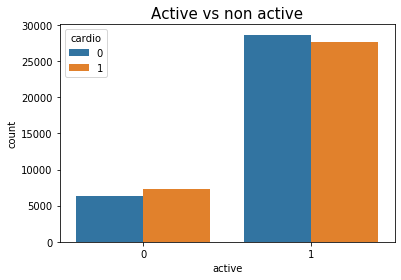

In [323]:
# Plot active vs non active
sns.countplot(x = 'active', hue = 'cardio', data = df).set_title('Active vs non active', fontsize = 15)

There seems to be an a slight difference in the chances of contracting CVDs with regards to whether or not the individual leads an active lifestyle.

Unfortunately as with smokers from above, the dataset does not tell us which group 0 and 1 represents, we will be dropping this column too.

### Feature Engineering

As we can tell from the above correlation, height doesn't seem to have a huge correlation with CVDs. However, we can make use of it to derive the BMI of individuals and use it to help train our model.

In [324]:
def BMI_calc(w, h):
    return w/(h**2)

In [325]:
x['BMI'] = x['weight'] / ((x['height']/100)**2)

In [326]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


Now that we have the BMI, let's start detecting the gender of the patients.

We know that in general, males are taller than females. Hence, we can use this feature to assign gender to the data.

In [327]:
# Get the mean height of Gender 1 and Gender 2
a = x[x['gender'] == 1]['height'].mean()
b = x[x['gender'] == 2]['height'].mean()
# Comparison conditions
if a > b:
    gender = 'male'
    gender2 = 'female'
else:
    gender = 'female'
    gender2 = 'male'

print('Gender: 1 is ' + gender + ' & Gender: 2 is ' + gender2)

Gender: 1 is female & Gender: 2 is male


We take the remainder to make the data into 0 = female and 1 = male

In [328]:
x['gender'] = x['gender'] % 2

We can now standardize and melt the data.

In [329]:
from sklearn.preprocessing import StandardScaler

x_standard = z(x)

data = pd.melt(x_standard, id_vars = 'cardio', var_name = 'features', value_name = 'value')
data

,cardio,features,value
0,0,age,-0.436071
1,1,age,0.307635
2,1,age,-0.248017
3,1,age,-0.748143
4,0,age,-0.808532
...,...,...,...
839707,0,BMI,26.927438
839708,1,BMI,50.472681
839709,1,BMI,31.353579
839710,1,BMI,27.099251


We can now plot out data. We will use a violin plot and split it into quaritles.

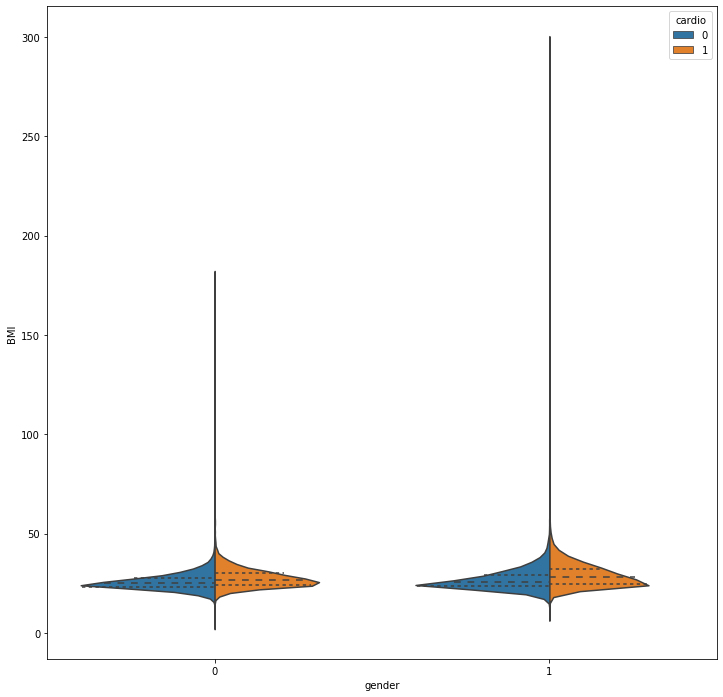

In [330]:
plt.figure(figsize = (12, 12))
sns.violinplot(x = 'gender', y = 'BMI', hue = 'cardio', data = x_standard, split = True, inner = 'quart' )

From the plot, we can tell that the median and quartiles of BMI distribution is higher for individuals with CVDs and individuals without CVDs regardless of gender.

### Preparing Training and Test Sets

We shall now split our data into training and data sets.

In [331]:
y = x['cardio']
y.shape

(69976,)

As mentioned above, we will be dropping smoke, alco and active columns.

In [332]:
x.drop(['cardio', 'smoke', 'alco', 'active'], axis = 1, inplace = True)
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,BMI
0,18393,0,168,62.0,110,80,1,1,21.967120
1,20228,1,156,85.0,140,90,3,1,34.927679
2,18857,1,165,64.0,130,70,3,1,23.507805
3,17623,0,169,82.0,150,100,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,23.011177


In [333]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

After splitting the data we will now normalize the train and test sets.

In [334]:
from sklearn.preprocessing import normalize
x_train = normalize(x_train)
x_test = normalize(x_test)
x = normalize(x)

### Model Scores

Now that we have normalized our data, we can start using it in our selected models.

We will be utilising the following 5 models:

1) Decision Tree Classifier

2) Random Forest Classifier

3) K-Neighbors Classifier

4) Support Vector Classification

5) Gaussian Naive Bayes

In [335]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dec = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=100)
svm = SVC(random_state=1)
gnb = GaussianNB()

models = {'Decision tree' : dec,
          'Random Forest' : forest,
          'KNN' : knn,
          'SVM' : svm,
          'Naive Bayes' : gnb}
scores= { }

for key, value in models.items():    
    model = value
    model.fit(x_train, y_train)
    scores[key] = model.score(x_test, y_test)

In [336]:
df_scores = pd.DataFrame(scores, index = ['Accuracy Score']).T
df_scores.sort_values(by = ['Accuracy Score'], axis = 0, ascending = False, inplace = True)
df_scores

,Accuracy Score
KNN,0.712989
Random Forest,0.712061
Decision tree,0.634681
Naive Bayes,0.564947
SVM,0.504716


As we can tell, Random Forest and KNN models are far ahead in terms of accuracy.

We shall focus on these 2 algorithms.

### K Fold Cross Validation

Let's examine if our model is consistent.

In [337]:
from sklearn.model_selection import cross_val_score
random_forest_acc = cross_val_score(estimator = forest, X = x_train, y = y_train, cv = 10)
knn_acc = cross_val_score(estimator = knn, X = x_train, y = y_train, cv = 10)

In [338]:
print('Random Forest Average Accuracy: ', random_forest_acc.mean())
print('Random Forest Standard Deviation: ', random_forest_acc.std())
print('KNN Average Accuracy: ', knn_acc.mean())
print('KNN Standard Deviation: ', knn_acc.std())

Random Forest Average Accuracy:  0.7125937834941051
Random Forest Standard Deviation:  0.006198127551972246
KNN Average Accuracy:  0.7160771704180064
KNN Standard Deviation:  0.007994480252099614


The standard deviation for both models are small, hence they are able to achieve consistent results.

We select the Random Forest Classifier because it is more consistent.

### Tuning Model with Grid Search

We use grid search to find the best n_parameter value for our model.

In [339]:
from sklearn.model_selection import GridSearchCV

grid = {'n_estimators': np.arange(10, 200, 10)}

forest_cv = GridSearchCV(forest, grid, cv = 3)
forest_cv.fit(x_train, y_train)

print('n_estimators: {}'.format(forest_cv.best_params_))
print('Best score: {}'.format(forest_cv.best_score_))

n_estimators: {'n_estimators': 160}
Best score: 0.714076455877099


### Confusion Matrix

In [340]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, forest_cv.predict(x_test))

Model Test Accuracy = 0.7128465275793083


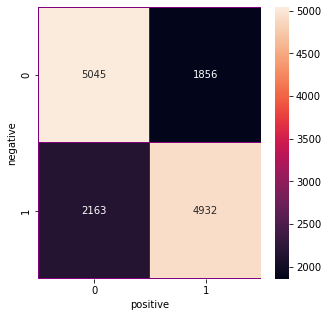

In [341]:
tn = cm[0][0] # True negative
tp = cm[1][1] # True positive
fn = cm[1][0] # False negative
fp = cm[0][1] # False positive

f, ax = plt.subplots(figsize = (5, 5))
sns.heatmap(cm, fmt = '.0f', annot = True, linewidths = 0.2, linecolor = 'purple', ax = ax)
plt.xlabel('positive')
plt.ylabel('negative')

#print the model's accuracy on the test data
print('Model Test Accuracy = {}'.format((tp + tn) / (tp + tn + fn + fp)))

True negative = (0,0)
True positive = (1,1)
False negative = (1,0)
false positive = (0,1)

### F1 score

In [342]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

forest_precision = precision_score(y_test, forest_cv.predict(x_test))
forest_recall = recall_score(y_test, forest_cv.predict(x_test))
forest_f1 = f1_score(y_test, forest_cv.predict(x_test))

print('Precision score: {} '.format(forest_precision))
print('Recall score: {} '.format(forest_recall))
print('F1 score: {} '.format(forest_f1))

Precision score: 0.7265763111373011 
Recall score: 0.695137420718816 
F1 score: 0.710509255924512 


### Conclusion

Our model has an accuracy score of 71.4%.
On top of this it has a high precision score and high recall score ie. low false positive rate and low false negative rate.

The model can be made more accurate by having either a even larger sample or having further classifications to lifestyle choices such that further exploration can be made into that area.